In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Breast Cancer Data.xlsx")

In [3]:
df.head(10)

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,target
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events
5,60-69,ge40,15-19,0-2,no,2,left,left_low,no,no-recurrence-events
6,50-59,premeno,25-29,0-2,no,2,left,left_low,no,no-recurrence-events
7,60-69,ge40,20-24,0-2,no,1,left,left_low,no,no-recurrence-events
8,40-49,premeno,50-54,0-2,no,2,left,left_low,no,no-recurrence-events
9,40-49,premeno,20-24,0-2,no,2,right,left_up,no,no-recurrence-events


In [4]:
df.shape

(286, 10)

In [5]:
df.isna().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
target         0
dtype: int64

In [6]:
df.dropna(inplace = True)

In [7]:
df.shape

(277, 10)

In [8]:
df.isna().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
target         0
dtype: int64

In [9]:
df.reset_index(drop=True)

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,target
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events
...,...,...,...,...,...,...,...,...,...,...
272,30-39,premeno,30-34,0-2,no,2,left,left_up,no,recurrence-events
273,30-39,premeno,20-24,0-2,no,3,left,left_up,yes,recurrence-events
274,60-69,ge40,20-24,0-2,no,1,right,left_up,no,recurrence-events
275,40-49,ge40,30-34,3-5,no,3,left,left_low,no,recurrence-events


In [10]:
df['age'].unique()

array(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], dtype=object)

## Data Preprocessing ##

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
columns_to_encode = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat', 'target']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    df[f"{column}_code"] = label_encoder.fit_transform(df[column]) + 1

In [13]:
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,target,age_code,menopause_code,tumor-size_code,inv-nodes_code,node-caps_code,deg-malig_code,breast_code,breast-quad_code,irradiat_code,target_code
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events,2,3,6,1,1,3,1,2,1,1
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events,3,3,4,1,1,2,2,5,1,1
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events,3,3,4,1,1,2,1,2,1,1
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events,5,1,3,1,1,2,2,3,1,1
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events,3,3,1,1,1,2,2,4,1,1


In [14]:
X = df[['age_code', 'menopause_code', 'tumor-size_code', 'inv-nodes_code', 'node-caps_code', 'deg-malig_code', 'breast_code', 'breast-quad_code', 'irradiat_code']].values
X[0:5]

array([[2, 3, 6, 1, 1, 3, 1, 2, 1],
       [3, 3, 4, 1, 1, 2, 2, 5, 1],
       [3, 3, 4, 1, 1, 2, 1, 2, 1],
       [5, 1, 3, 1, 1, 2, 2, 3, 1],
       [3, 3, 1, 1, 1, 2, 2, 4, 1]], dtype=int64)

In [15]:
y = df['target_code'].values

In [16]:
y[0:5]

array([1, 1, 1, 1, 1])

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify = y, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (221, 9) (221,)
Test set: (56, 9) (56,)


## K Nearest Neighbors

In [26]:
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [27]:
predictions_knn = KNN.predict(X_test)

In [28]:
KNN_Accuracy_Score = metrics.accuracy_score(predictions_knn, y_test)
KNN_JaccardIndex = metrics.jaccard_score(predictions_knn, y_test)
KNN_F1_Score = metrics.f1_score(predictions_knn, y_test)

In [29]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, KNN.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, predictions_knn))

Train set Accuracy:  0.7782805429864253
Test set Accuracy:  0.6785714285714286


              precision    recall  f1-score   support

           1       0.71      0.93      0.80        40
           2       0.25      0.06      0.10        16

    accuracy                           0.68        56
   macro avg       0.48      0.49      0.45        56
weighted avg       0.58      0.68      0.60        56

Confusion matrix, without normalization
[[1 0]
 [0 0]]


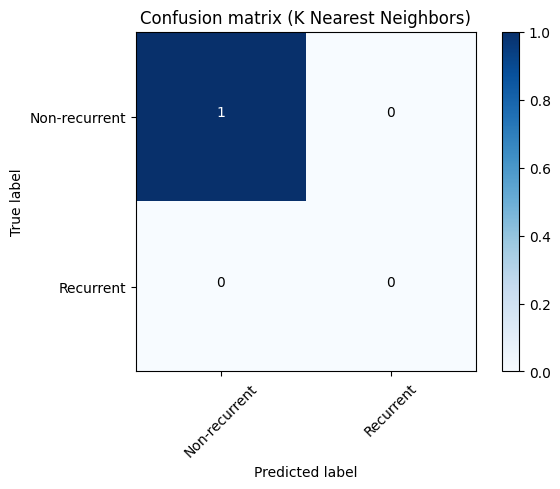

In [122]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions_knn, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, predictions_knn))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non-recurrent','Recurrent'],normalize= False,  title='Confusion matrix (K Nearest Neighbors)')

## Decision Tree ##

In [31]:
Tree = DecisionTreeClassifier()
Tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
predictions_tree = Tree.predict(X_test)

In [33]:
Tree_Accuracy_Score = metrics.accuracy_score(predictions_tree, y_test)
Tree_JaccardIndex = metrics.jaccard_score(predictions_tree, y_test)
Tree_F1_Score = metrics.f1_score(predictions_tree, y_test)

In [34]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, Tree.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, predictions_tree))

Train set Accuracy:  0.9773755656108597
Test set Accuracy:  0.625


              precision    recall  f1-score   support

           1       0.74      0.72      0.73        40
           2       0.35      0.38      0.36        16

    accuracy                           0.62        56
   macro avg       0.55      0.55      0.55        56
weighted avg       0.63      0.62      0.63        56

Confusion matrix, without normalization
[[6 0]
 [0 0]]


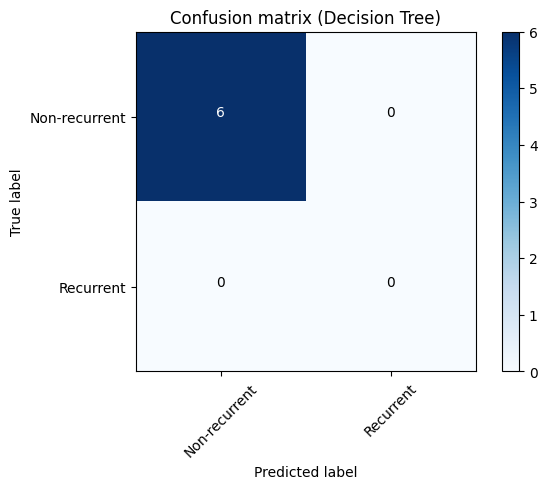

In [121]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions_tree, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, predictions_tree))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non-recurrent','Recurrent'],normalize= False,  title='Confusion matrix (Decision Tree)')

## Logistic Regression ##

In [36]:
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [37]:
predictions_lr = LR.predict(X_test)

In [38]:
LR_Accuracy_Score = metrics.accuracy_score(y_test, predictions_lr)
LR_JaccardIndex = metrics.jaccard_score(y_test, predictions_lr)
LR_F1_Score = metrics.f1_score(y_test, predictions_lr)
LR_Log_Loss = metrics.log_loss(y_test, predictions_lr)

In [39]:
from sklearn.metrics import jaccard_score
print("Jaccard Score: ", jaccard_score(y_test, predictions_lr))

Jaccard Score:  0.6530612244897959


In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, predictions_lr, labels=[1,0]))

[[32  0]
 [ 0  0]]


Confusion matrix, without normalization
[[32  0]
 [ 0  0]]


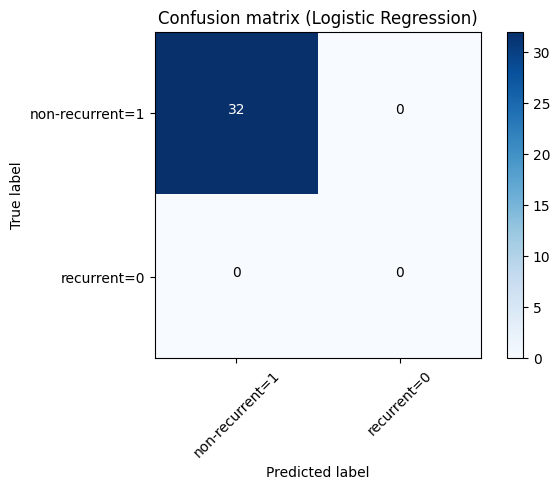

In [41]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions_lr, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['non-recurrent=1','recurrent=0'],normalize= False,  title='Confusion matrix (Logistic Regression)')

## Support Vector Machine ##

In [42]:
SVM = svm.SVC()
SVM.fit(X_train, y_train)

SVC()

In [43]:
predictions_svm = SVM.predict(X_test)

In [44]:
SVM_Accuracy_Score = metrics.accuracy_score(predictions_svm, y_test)
SVM_JaccardIndex = metrics.jaccard_score(predictions_svm, y_test)
SVM_F1_Score = metrics.f1_score(predictions_svm, y_test)

In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.85      0.88      0.86        40
           2       0.67      0.62      0.65        16

    accuracy                           0.80        56
   macro avg       0.76      0.75      0.75        56
weighted avg       0.80      0.80      0.80        56

Confusion matrix, without normalization
[[10  0]
 [ 0  0]]


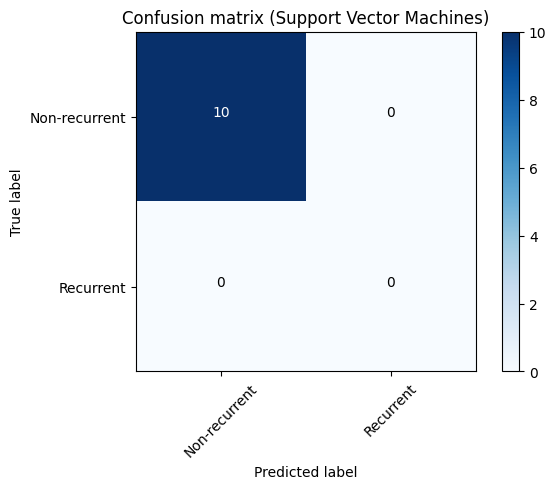

In [46]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions_svm, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, predictions_svm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non-recurrent','Recurrent'],normalize= False,  title='Confusion matrix (Support Vector Machines)')

In [47]:
from sklearn.metrics import f1_score
print("F1 Score: ", f1_score(y_test, predictions_svm, average='weighted'))

F1 Score:  0.801615747852307


In [48]:
from sklearn.metrics import jaccard_score
print("Jaccard Score: ", jaccard_score(y_test, predictions_svm,))

Jaccard Score:  0.7608695652173914


## Final Report ##

In [49]:
Report = pd.DataFrame({'Algorithm' : ['LogisticRegression', 'KNN', 'SVM', 'Decision Tree']})


Report['Accuracy'] = [LR_Accuracy_Score, KNN_Accuracy_Score, SVM_Accuracy_Score, Tree_Accuracy_Score]
Report['Jaccard'] = [LR_JaccardIndex, KNN_JaccardIndex, SVM_JaccardIndex, Tree_JaccardIndex]
Report['F1-Score'] = [LR_F1_Score, KNN_F1_Score, SVM_F1_Score, Tree_F1_Score]
Report['LogLoss'] = [ LR_Log_Loss, 'N/A', 'N/A', 'N/A']
Report

,Algorithm,Accuracy,Jaccard,F1-Score,LogLoss
0,LogisticRegression,0.696429,0.653061,0.790123,25.745467
1,KNN,0.678571,0.672727,0.804348,N/A
2,SVM,0.803571,0.760870,0.864198,N/A
3,Decision Tree,0.625000,0.580000,0.734177,N/A


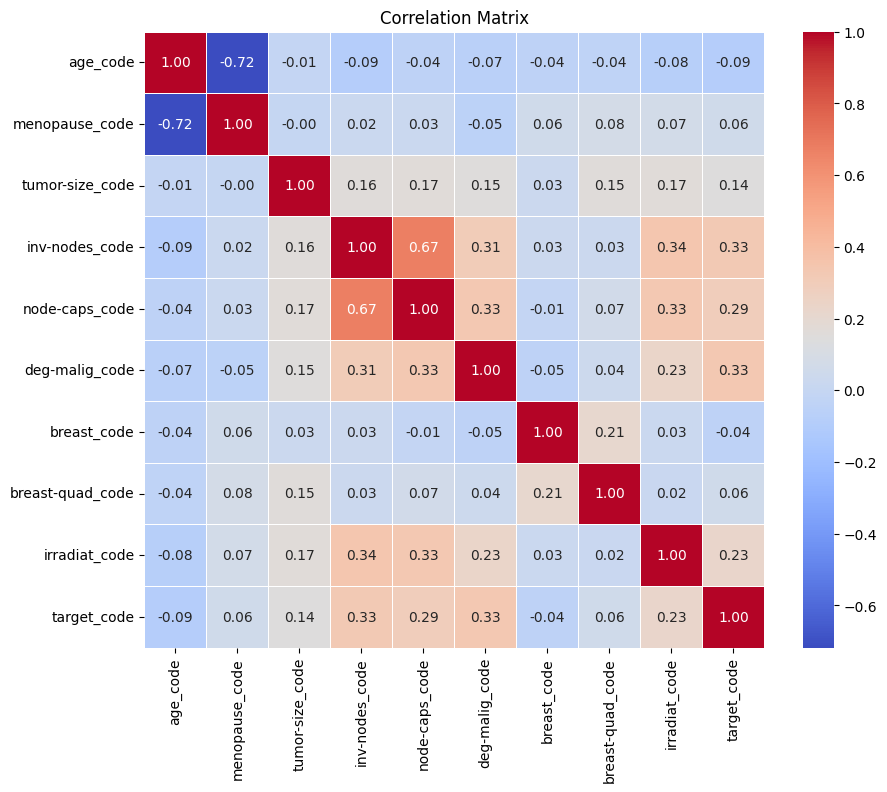

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
predictor_columns = df[['age_code', 'menopause_code', 'tumor-size_code', 'inv-nodes_code', 'node-caps_code', 'deg-malig_code', 'breast_code', 'breast-quad_code', 'irradiat_code', 'target_code']]


# Select the relevant columns from the DataFrame
selected_columns = predictor_columns
df_subset = selected_columns

# Calculate the correlation matrix
correlation_matrix = df_subset.corr()

# Plot the heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

C:\Users\Ihtisham\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


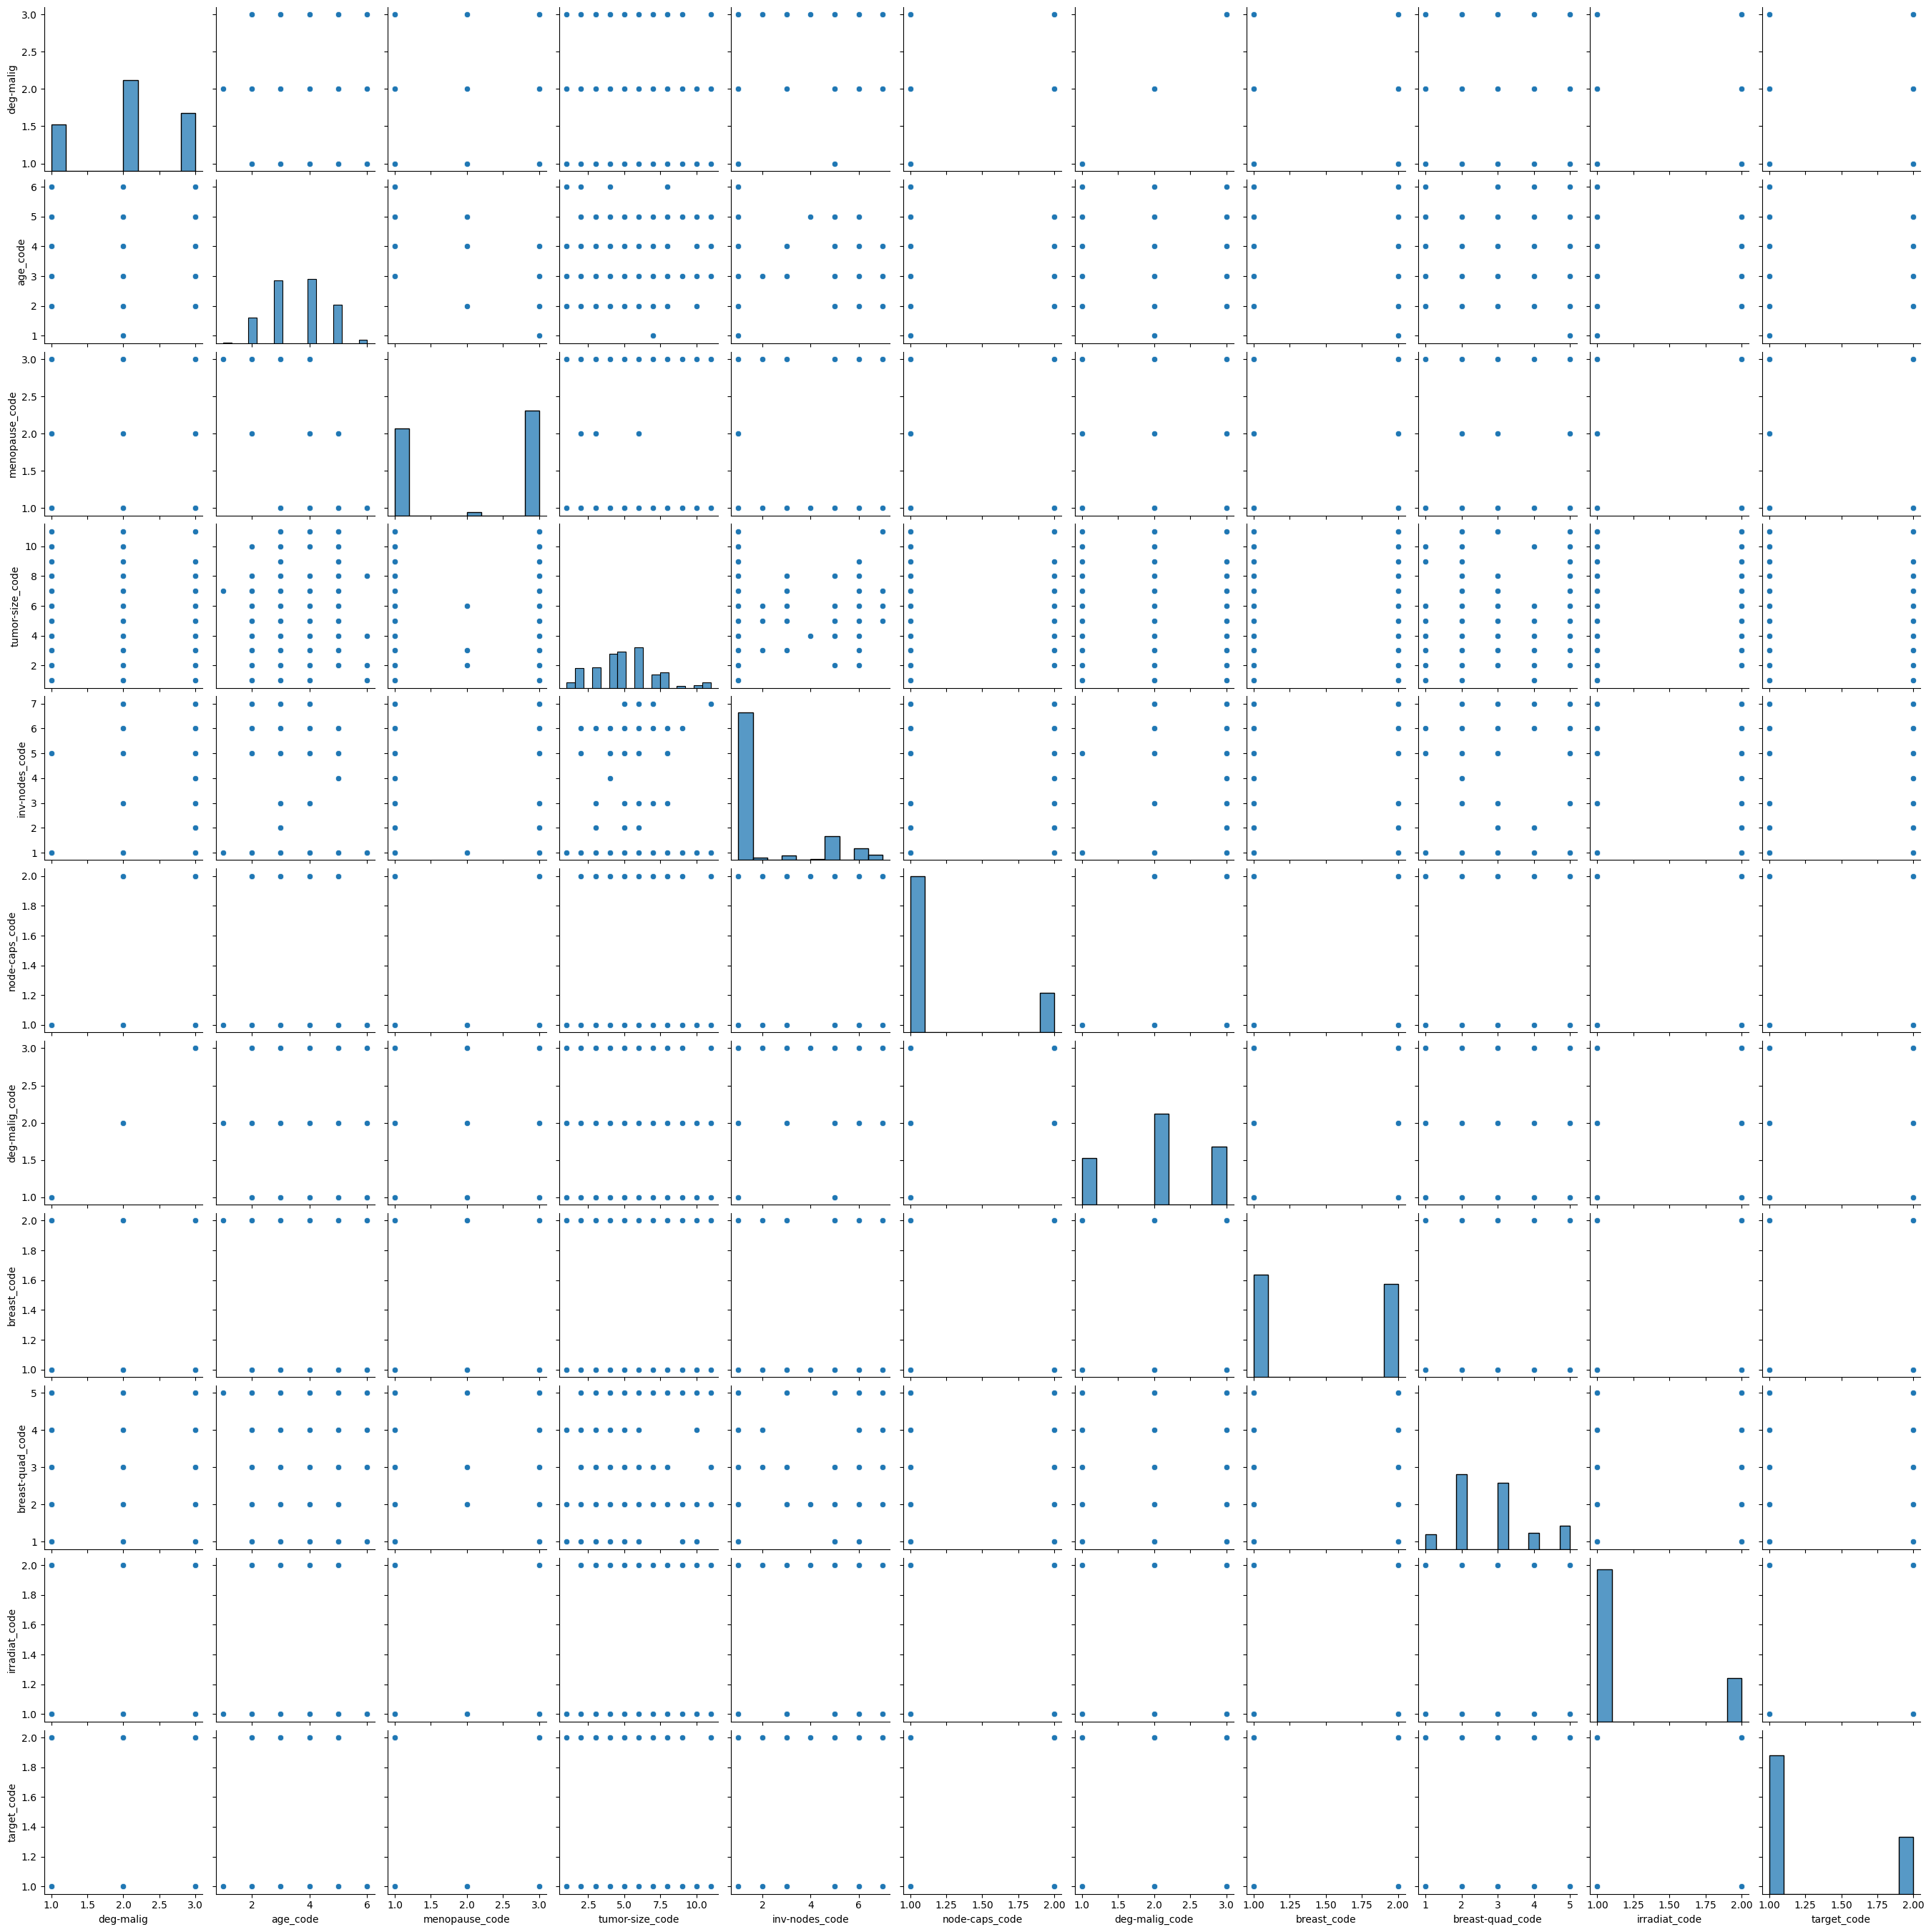

In [51]:
sns.pairplot(df);

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 0 to 285
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               277 non-null    object
 1   menopause         277 non-null    object
 2   tumor-size        277 non-null    object
 3   inv-nodes         277 non-null    object
 4   node-caps         277 non-null    object
 5   deg-malig         277 non-null    int64 
 6   breast            277 non-null    object
 7   breast-quad       277 non-null    object
 8   irradiat          277 non-null    object
 9   target            277 non-null    object
 10  age_code          277 non-null    int32 
 11  menopause_code    277 non-null    int32 
 12  tumor-size_code   277 non-null    int32 
 13  inv-nodes_code    277 non-null    int32 
 14  node-caps_code    277 non-null    int32 
 15  deg-malig_code    277 non-null    int64 
 16  breast_code       277 non-null    int32 
 17  breast-quad_code  277

In [53]:
df_1 = df[['age_code', 'menopause_code', 'tumor-size_code', 'inv-nodes_code', 'node-caps_code', 'deg-malig_code', 'breast_code', 'breast-quad_code', 'irradiat_code', 'target_code']]

In [54]:
df_2 = df[['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat', 'target']]

C:\Users\Ihtisham\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


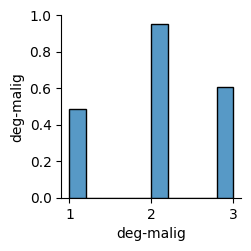

In [55]:
sns.pairplot(df_2);

C:\Users\Ihtisham\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


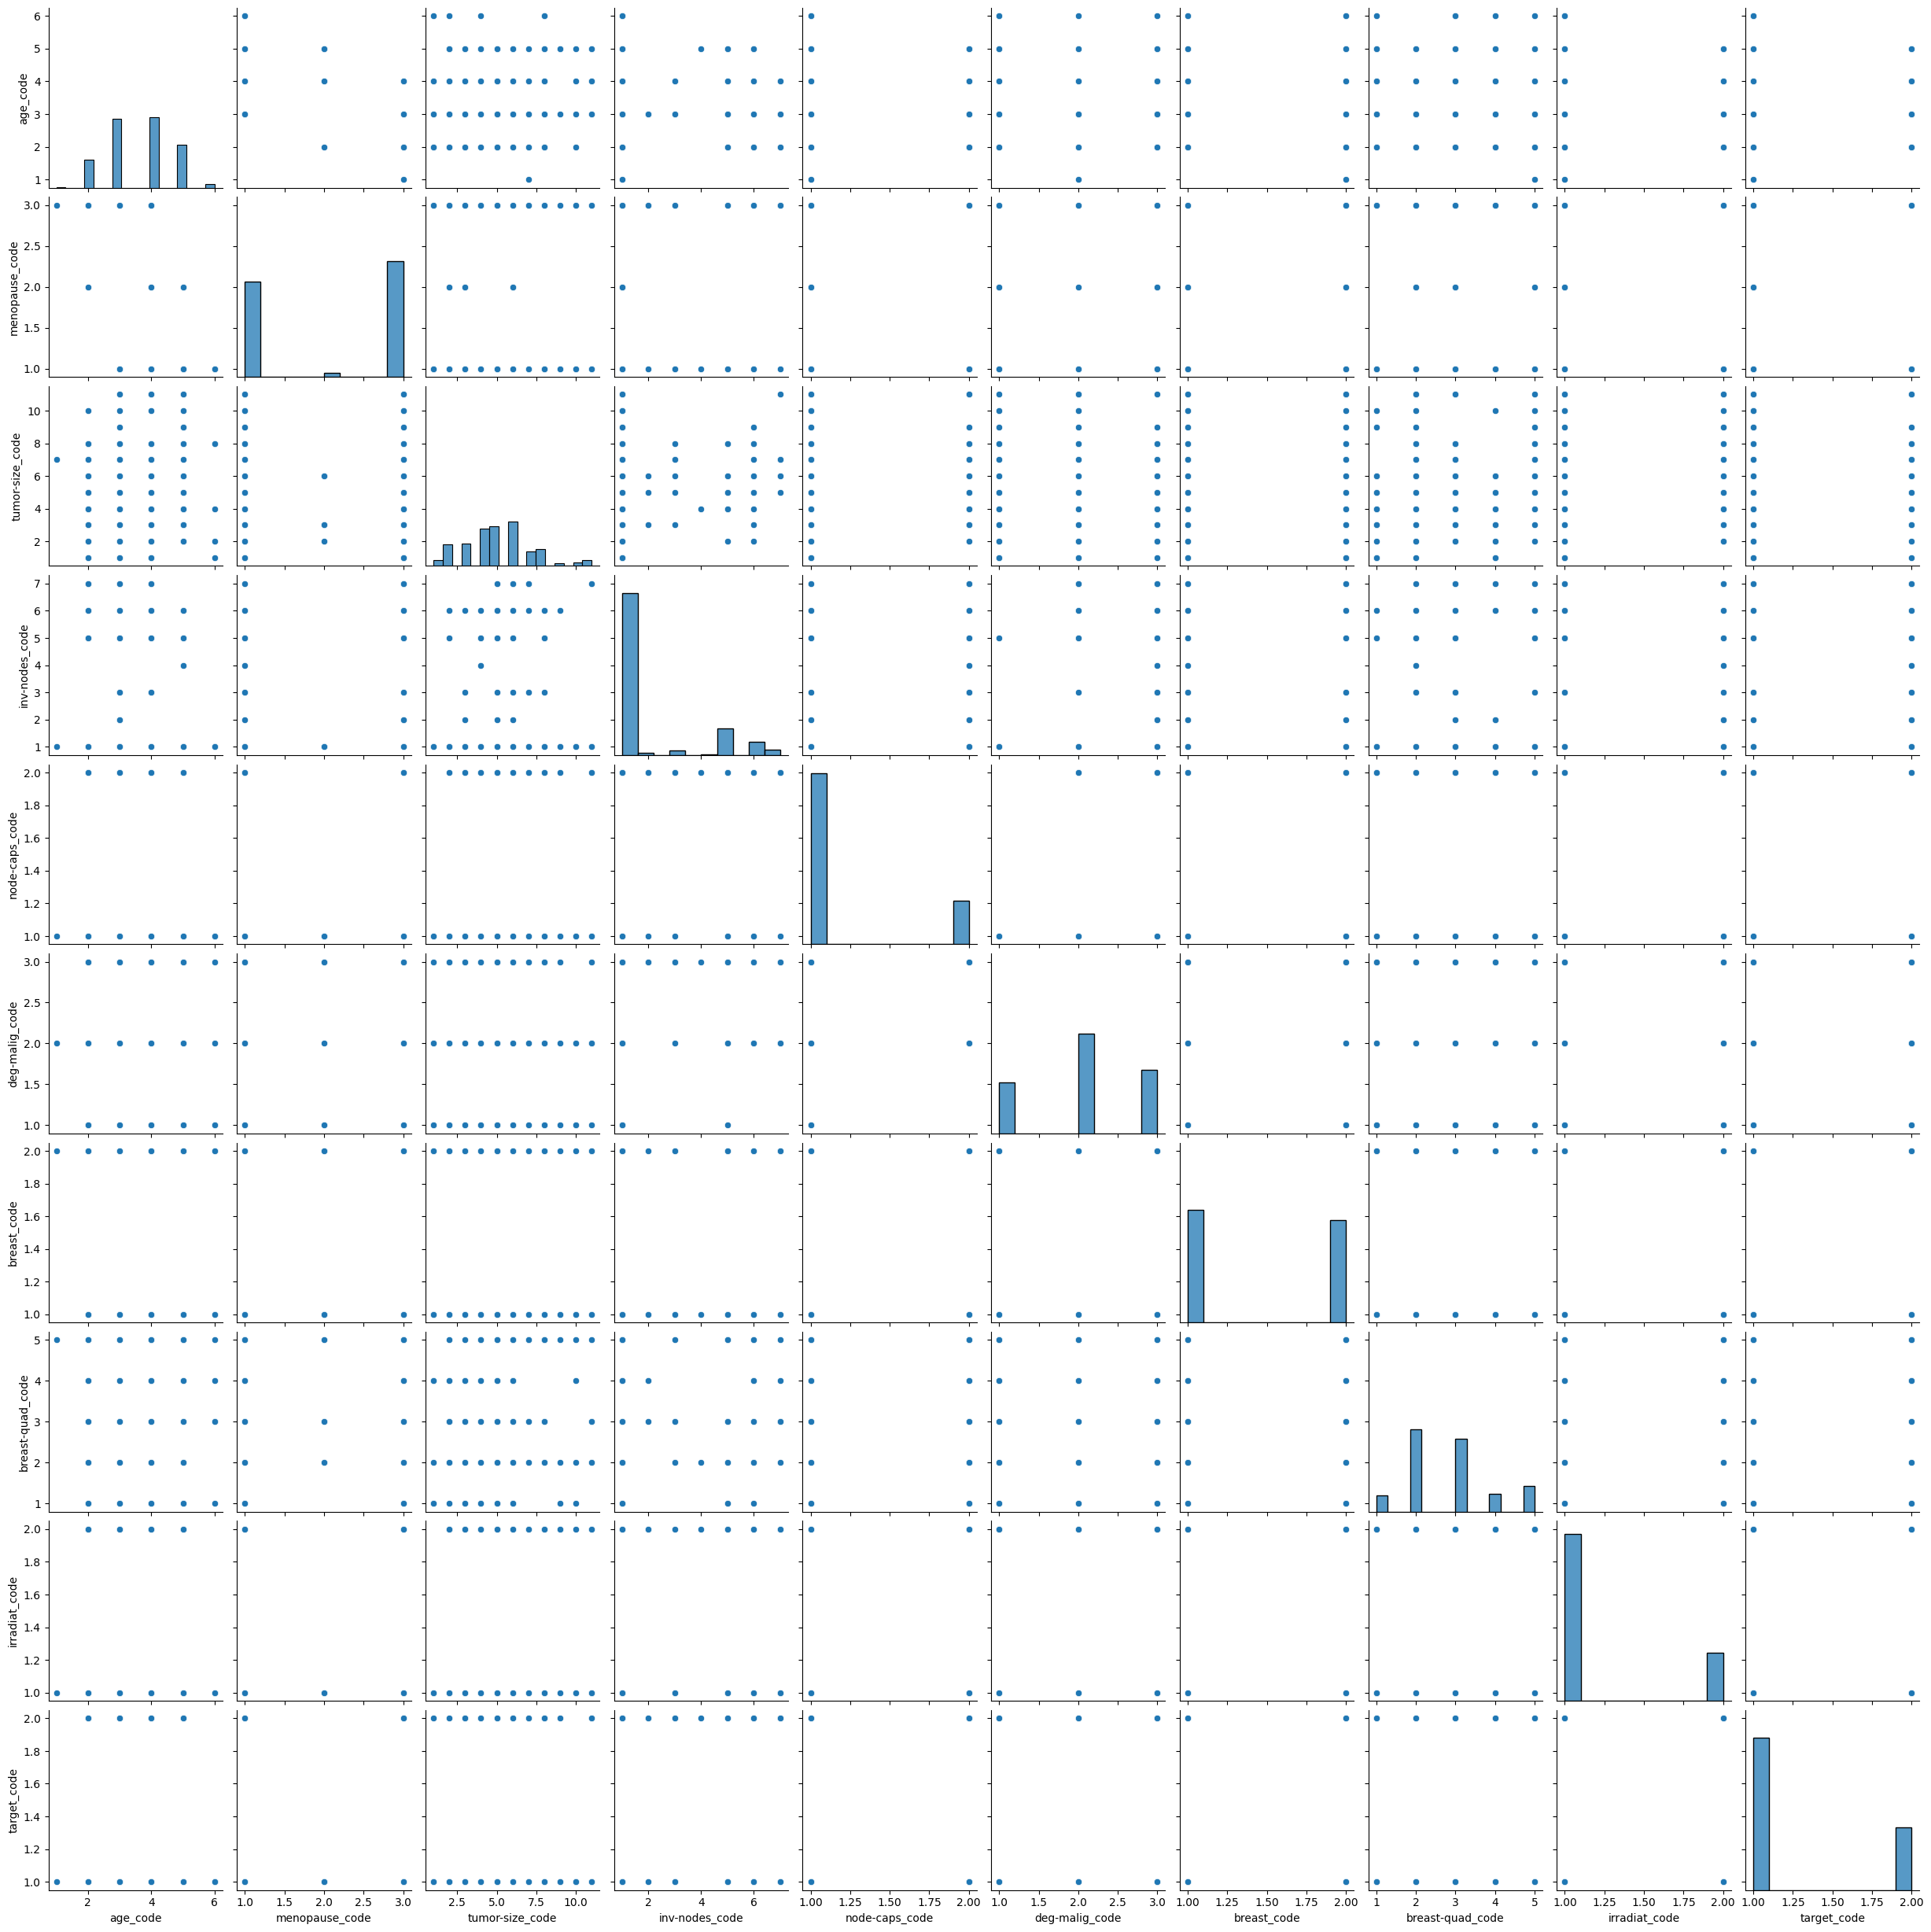

In [56]:
sns.pairplot(df_1);

In [57]:
print(pd.__version__)

2.0.3


In [58]:
print(np.__version__)

1.25.2


In [59]:
print(sns.__version__)

0.12.2


In [60]:
print(plt.__version__)

AttributeError: module 'matplotlib.pyplot' has no attribute '__version__'

In [68]:
pip show matplotlib

Name: matplotlib
Version: 3.7.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: C:\Users\Ihtisham\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: pywaffle, seaborn
Note: you may need to restart the kernel to use updated packages.


In [69]:
pip show scikit-learn

Name: scikit-learnNote: you may need to restart the kernel to use updated packages.

Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\Ihtisham\AppData\Local\Programs\Python\Python311\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 


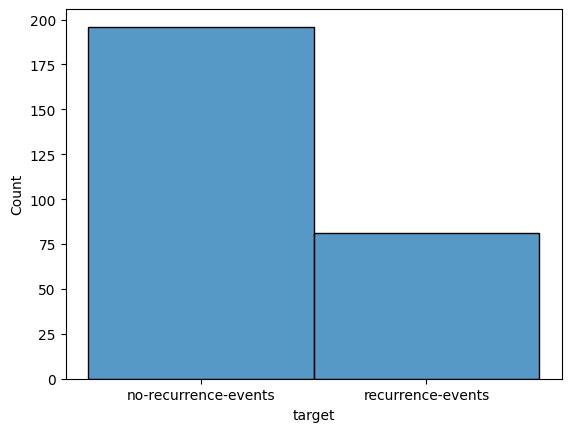

In [70]:
sns.histplot(data = df['target']);

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 0 to 285
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               277 non-null    object
 1   menopause         277 non-null    object
 2   tumor-size        277 non-null    object
 3   inv-nodes         277 non-null    object
 4   node-caps         277 non-null    object
 5   deg-malig         277 non-null    int64 
 6   breast            277 non-null    object
 7   breast-quad       277 non-null    object
 8   irradiat          277 non-null    object
 9   target            277 non-null    object
 10  age_code          277 non-null    int32 
 11  menopause_code    277 non-null    int32 
 12  tumor-size_code   277 non-null    int32 
 13  inv-nodes_code    277 non-null    int32 
 14  node-caps_code    277 non-null    int32 
 15  deg-malig_code    277 non-null    int64 
 16  breast_code       277 non-null    int32 
 17  breast-quad_code  277

In [72]:
df['age'].value_counts(ascending = True)

age
20-29     1
70-79     5
30-39    36
60-69    55
40-49    89
50-59    91
Name: count, dtype: int64

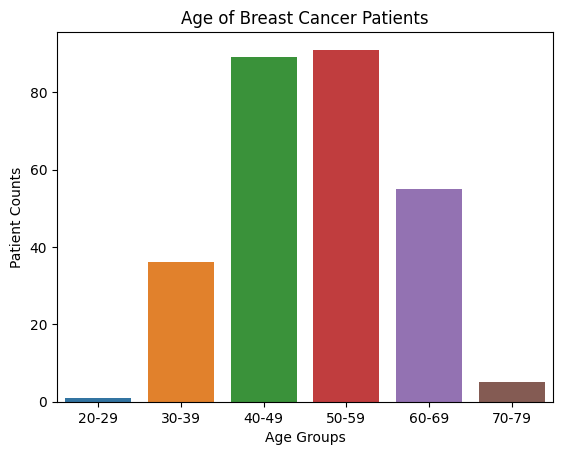

In [73]:
age_range = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
age_counts = [1, 36, 89, 91, 55, 5]
ax = sns.barplot(x = age_range, y = age_counts)
ax.set_xlabel("Age Groups")
ax.set_ylabel("Patient Counts")
ax.set_title("Age of Breast Cancer Patients")
plt.show()

In [74]:
df['menopause'].value_counts(ascending = True)

menopause
lt40         5
ge40       123
premeno    149
Name: count, dtype: int64

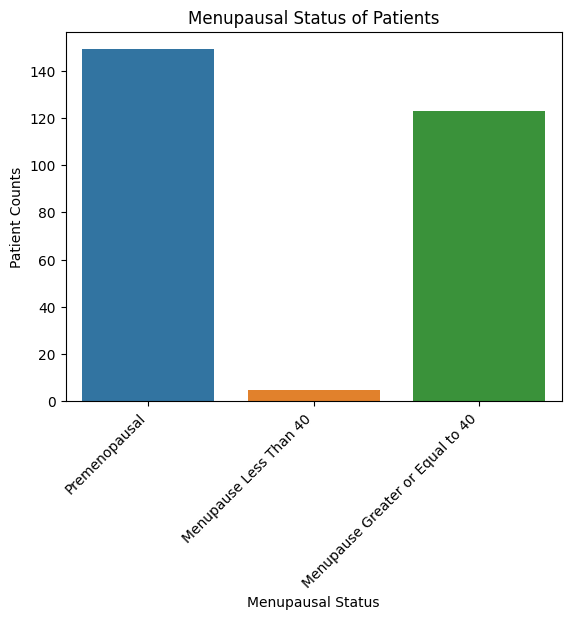

In [75]:
menu_status = ['Premenopausal', 'Menupause Less Than 40', 'Menupause Greater or Equal to 40']
menu_values = [149, 5, 123]
ax = sns.barplot(x = menu_status, y = menu_values)
ax.set_xlabel("Menupausal Status")
ax.set_ylabel("Patient Counts")
ax.set_title("Menupausal Status of Patients")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

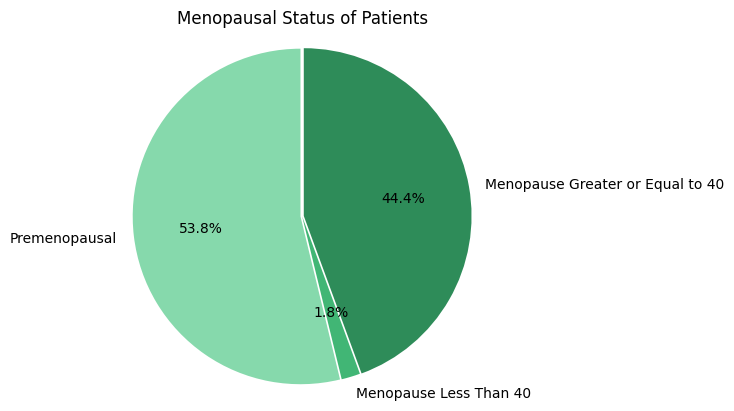

In [76]:
menu_status = ['Premenopausal', 'Menopause Less Than 40', 'Menopause Greater or Equal to 40']
menu_values = [149, 5, 123]

# Specify the degree of separation for each slice
explode = (0.01, 0, 0.01)  # Separation for the first slice (Premenopausal)
colors = colors = ['#86D9AC', '#41B675', '#2E8C59']
# Create a pie chart with separation
plt.pie(menu_values, labels=menu_status, autopct='%1.1f%%', startangle=90, explode=explode, colors = colors)

plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title("Menopausal Status of Patients")

plt.show()

In [77]:
df['tumor-size'].value_counts(ascending = True)

tumor-size
45-49     3
5-9       4
0-4       8
50-54     8
35-39    19
40-44    22
10-14    28
15-19    29
20-24    48
25-29    51
30-34    57
Name: count, dtype: int64

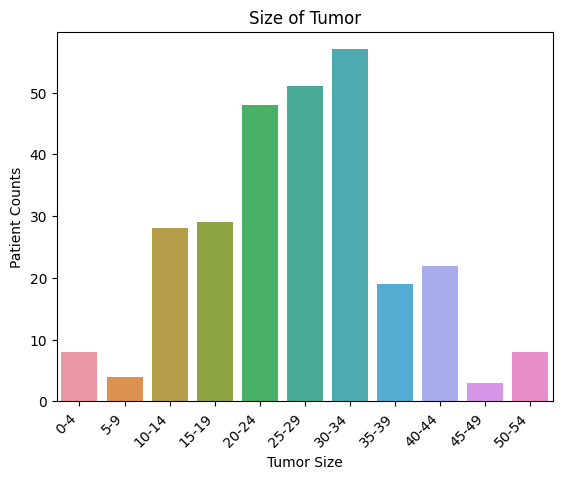

In [78]:
tumor_size = ["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54"]
tumor_values = [8, 4, 28, 29, 48, 51, 57, 19, 22, 3, 8]
ax = sns.barplot(x = tumor_size, y = tumor_values)
ax.set_xlabel("Tumor Size")
ax.set_ylabel("Patient Counts")
ax.set_title("Size of Tumor")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
plt.show()

In [79]:
df['inv-nodes'].value_counts(ascending = True)

inv-nodes
24-26      1
12-14      3
15-17      6
9-11       7
6-8       17
3-5       34
0-2      209
Name: count, dtype: int64

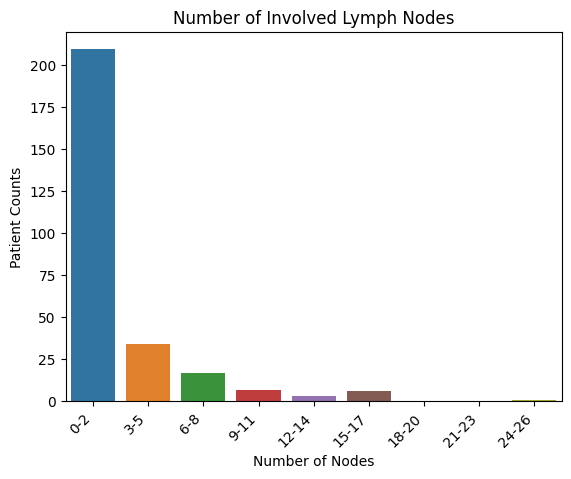

In [80]:
inv_nodes = ["0-2", "3-5", "6-8", "9-11", "12-14", "15-17", "18-20", "21-23", "24-26"]
inv_values = [209, 34, 17, 7, 3, 6, 0, 0, 1]
ax = sns.barplot(x = inv_nodes, y = inv_values)
ax.set_xlabel("Number of Nodes")
ax.set_ylabel("Patient Counts")
ax.set_title("Number of Involved Lymph Nodes")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
plt.show()

In [81]:
df['node-caps'].value_counts(ascending = True)

node-caps
yes     56
no     221
Name: count, dtype: int64

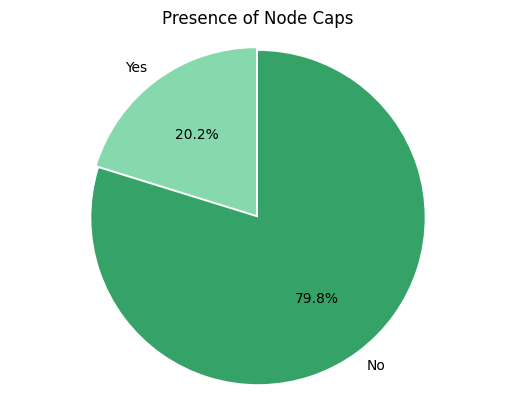

In [82]:
nodes_caps = ['Yes', 'No']
nodes_values = [56, 221]
explode = (0.02, 0)  # Separation for the first slice ('Yes')
colors = ['#86D9AC', '#35A367']
# Create a pie chart with separation and percentage labels
plt.pie(nodes_values, labels=nodes_caps, autopct='%1.1f%%', startangle=90, explode=explode, colors = colors)

plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title("Presence of Node Caps")

plt.show()

In [83]:
df['deg-malig'].value_counts(ascending = True)

deg-malig
1     66
3     82
2    129
Name: count, dtype: int64

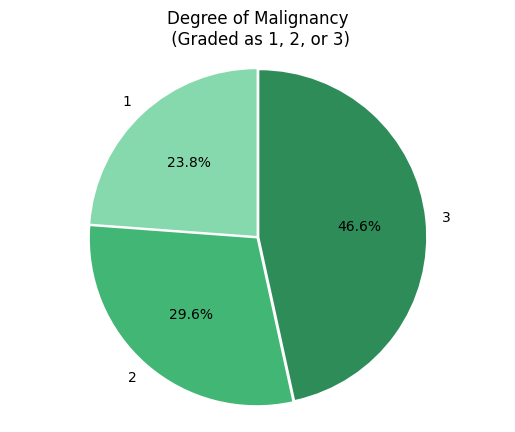

In [84]:
# Specify the degree of separation for each slice
deg_malig = ["1", "2", "3"]
deg_counts = [66, 82, 129]
explode = (0.01, 0.01, 0.01)  # Separation for the first slice (Premenopausal)
colors = colors = ['#86D9AC', '#41B675', '#2E8C59']
# Create a pie chart with separation
plt.pie(deg_counts, labels=deg_malig, autopct='%1.1f%%', startangle=90, explode=explode, colors = colors)

plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title("Degree of Malignancy\n (Graded as 1, 2, or 3)")

plt.show()

In [85]:
df['breast'].value_counts(ascending = True)

breast
right    132
left     145
Name: count, dtype: int64

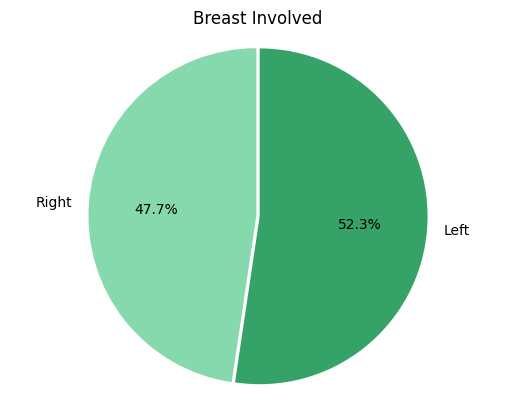

In [86]:
nodes_caps = ['Right', 'Left']
nodes_values = [132, 145]
explode = (0.02, 0)  # Separation for the first slice ('Yes')
colors = ['#86D9AC', '#35A367']
# Create a pie chart with separation and percentage labels
plt.pie(nodes_values, labels=nodes_caps, autopct='%1.1f%%', startangle=90, explode=explode, colors = colors)

plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title("Breast Involved")

plt.show()

In [87]:
df['breast-quad'].value_counts(ascending = True)

breast-quad
central       21
right_low     23
right_up      33
left_up       94
left_low     106
Name: count, dtype: int64

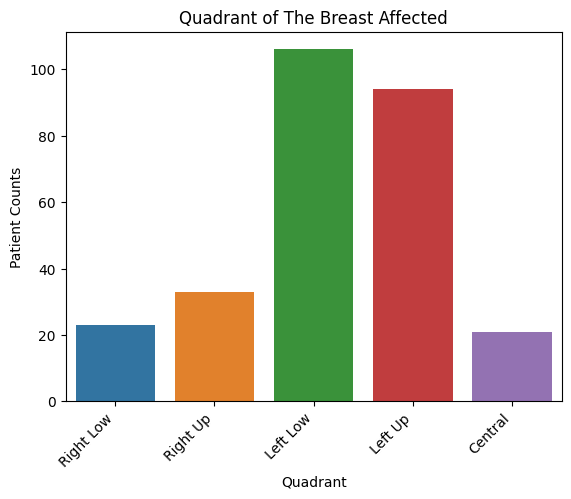

In [88]:
breast_quad = ["Right Low", "Right Up", "Left Low", "Left Up", "Central"]
quad_values = [23, 33, 106, 94, 21]
ax = sns.barplot(x = breast_quad, y = quad_values)
ax.set_xlabel("Quadrant")
ax.set_ylabel("Patient Counts")
ax.set_title("Quadrant of The Breast Affected")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
plt.show()

In [89]:
df['irradiat'].value_counts(ascending = True)

irradiat
yes     62
no     215
Name: count, dtype: int64

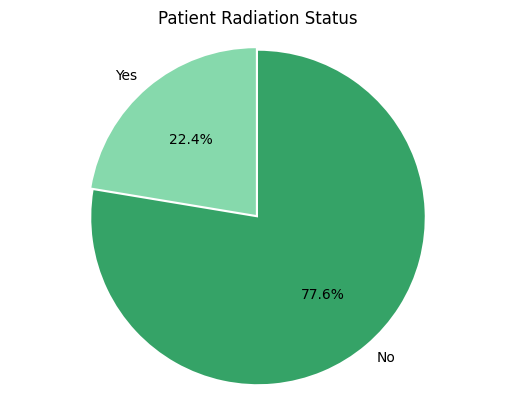

In [90]:
irradiat = ['Yes', 'No']
irr_values = [62, 215]
explode = (0.02, 0)  # Separation for the first slice ('Yes')
colors = ['#86D9AC', '#35A367']
# Create a pie chart with separation and percentage labels
plt.pie(irr_values, labels=irradiat, autopct='%1.1f%%', startangle=90, explode=explode, colors = colors)

plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title("Patient Radiation Status")

plt.show()

In [91]:
df['target'].value_counts(ascending = True)

target
recurrence-events        81
no-recurrence-events    196
Name: count, dtype: int64

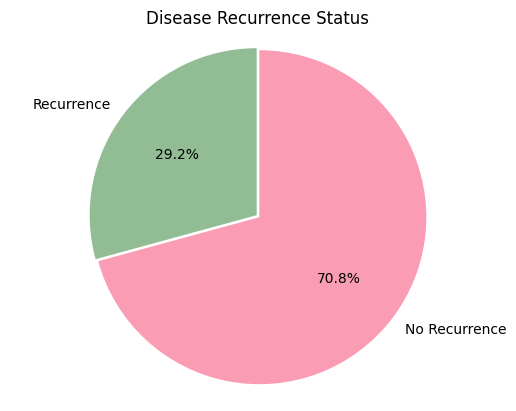

In [92]:
target = ['Recurrence', 'No Recurrence']
target_values = [81, 196]
explode = (0.02, 0)  # Separation for the first slice ('Yes')
colors = ['#91BC94', '#FB9CB5']
# Create a pie chart with separation and percentage labels
plt.pie(target_values, labels=target, autopct='%1.1f%%', startangle=90, explode=explode, colors = colors)

plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title("Disease Recurrence Status")

plt.show()

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 0 to 285
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               277 non-null    object
 1   menopause         277 non-null    object
 2   tumor-size        277 non-null    object
 3   inv-nodes         277 non-null    object
 4   node-caps         277 non-null    object
 5   deg-malig         277 non-null    int64 
 6   breast            277 non-null    object
 7   breast-quad       277 non-null    object
 8   irradiat          277 non-null    object
 9   target            277 non-null    object
 10  age_code          277 non-null    int32 
 11  menopause_code    277 non-null    int32 
 12  tumor-size_code   277 non-null    int32 
 13  inv-nodes_code    277 non-null    int32 
 14  node-caps_code    277 non-null    int32 
 15  deg-malig_code    277 non-null    int64 
 16  breast_code       277 non-null    int32 
 17  breast-quad_code  277

In [94]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

In [95]:
df['age_code'].unique()

array([2, 3, 5, 4, 6, 1])

In [96]:
df['menopause_code'].unique()

array([3, 1, 2])

In [97]:
df['tumor-size_code'].unique()

array([ 6,  4,  3,  1,  5, 11,  2,  8,  7, 10,  9])

In [98]:
df['inv-nodes_code'].unique()

array([1, 6, 7, 5, 3, 2, 4])

In [99]:
df['node-caps_code'].unique()

array([1, 2])

In [100]:
df['deg-malig_code'].unique()

array([3, 2, 1], dtype=int64)

In [101]:
df['breast_code'].unique()

array([1, 2])

In [102]:
df['breast-quad_code'].unique()

array([2, 5, 3, 4, 1])

In [103]:
df['irradiat_code'].unique()

array([1, 2])

In [104]:
df['target_code'].unique()

array([1, 2])

In [105]:
import pandas as pd
from scipy.stats import chi2_contingency

# Example DataFrame with multiple categorical variables

# Create a contingency table
contingency_table = pd.crosstab(
    df['target_code'],
    [
        df['age_code'],
        df['menopause_code'],
        df['tumor-size_code'],
        df['inv-nodes_code'],
        df['node-caps_code'],
        df['deg-malig_code'],
        df['breast_code'],
        df['breast-quad_code'],
        df['irradiat_code'],
    ]
)
observed_chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(observed_chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.9719819376969948


In [106]:
!pip install statsmodels


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [107]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

In [108]:
# Create a contingency table
contingency_table = pd.crosstab(
    df['target_code'],
    [
        df['age_code'],
        df['menopause_code'],
        df['tumor-size_code'],
        df['inv-nodes_code'],
        df['node-caps_code'],
        df['deg-malig_code'],
        df['breast_code'],
        df['breast-quad_code'],
        df['irradiat_code'],
    ]
)
observed_chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(observed_chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v}")

# Visualize with a mosaic plot
mosaic(contingency_table.stack(), title=f"Cramér's V: {cramers_v}")
plt.show()

Cramér's V: 0.9719819376969948


ValueError: You must pass an index if data is a DataFrame. See examples.

Cramér's V: 0.9719819376969948


KeyError: "[('irradiat_code', '', '', '', '', '', '', '') (1, 3, 7, 1, 1, 2, 2, 5)\n (2, 2, 3, 1, 1, 3, 2, 3) (2, 3, 1, 1, 1, 2, 2, 1)\n (2, 3, 2, 1, 1, 1, 2, 2) (2, 3, 2, 1, 1, 2, 1, 4)\n (2, 3, 3, 1, 1, 1, 1, 2) (2, 3, 3, 1, 1, 1, 2, 2)\n (2, 3, 3, 6, 2, 3, 1, 2) (2, 3, 4, 1, 1, 2, 1, 4)\n (2, 3, 4, 1, 1, 3, 1, 1) (2, 3, 4, 1, 1, 3, 1, 3)\n (2, 3, 4, 5, 1, 2, 2, 1) (2, 3, 4, 5, 2, 2, 1, 2)\n (2, 3, 4, 5, 2, 2, 2, 3) (2, 3, 5, 1, 1, 1, 1, 1)\n (2, 3, 5, 1, 1, 2, 1, 2) (2, 3, 5, 1, 1, 2, 2, 2)\n (2, 3, 5, 5, 2, 3, 1, 2) (2, 3, 5, 6, 2, 2, 2, 3)\n (2, 3, 5, 6, 2, 3, 1, 4) (2, 3, 6, 1, 1, 1, 2, 3)\n (2, 3, 6, 1, 1, 2, 1, 3) (2, 3, 6, 1, 1, 3, 1, 2)\n (2, 3, 6, 5, 1, 3, 2, 3) (2, 3, 6, 6, 2, 2, 2, 5)\n (2, 3, 6, 7, 1, 2, 2, 3) (2, 3, 7, 1, 1, 3, 1, 2)\n (2, 3, 7, 7, 2, 3, 1, 2) (2, 3, 8, 1, 1, 1, 1, 3)\n (2, 3, 8, 1, 1, 2, 1, 2) (2, 3, 8, 1, 1, 2, 2, 5)\n (2, 3, 8, 5, 1, 3, 2, 5) (2, 3, 10, 1, 1, 2, 1, 4)\n (3, 1, 4, 1, 1, 2, 2, 3) (3, 1, 4, 1, 1, 3, 1, 2)\n (3, 1, 4, 1, 1, 3, 1, 3) (3, 1, 4, 5, 1, 3, 2, 2)\n (3, 1, 5, 1, 1, 2, 1, 2) (3, 1, 5, 2, 2, 3, 1, 4)\n (3, 1, 6, 1, 1, 2, 1, 3) (3, 1, 6, 5, 1, 3, 1, 2)\n (3, 1, 8, 3, 2, 2, 2, 3) (3, 3, 1, 1, 1, 2, 2, 4)\n (3, 3, 1, 1, 1, 3, 1, 1) (3, 3, 2, 1, 1, 1, 2, 3)\n (3, 3, 2, 1, 1, 1, 2, 4) (3, 3, 2, 1, 1, 2, 1, 2)\n (3, 3, 2, 1, 1, 2, 1, 3) (3, 3, 2, 1, 1, 2, 2, 2)\n (3, 3, 2, 1, 1, 2, 2, 3) (3, 3, 3, 1, 1, 2, 1, 2)\n (3, 3, 3, 1, 1, 2, 1, 3) (3, 3, 3, 1, 2, 3, 2, 3)\n (3, 3, 3, 2, 1, 3, 2, 4) (3, 3, 3, 3, 2, 3, 1, 2)\n (3, 3, 4, 1, 1, 1, 1, 4) (3, 3, 4, 1, 1, 1, 2, 2)\n (3, 3, 4, 1, 1, 1, 2, 5) (3, 3, 4, 1, 1, 2, 1, 1)\n (3, 3, 4, 1, 1, 2, 1, 2) (3, 3, 4, 1, 1, 2, 1, 3)\n (3, 3, 4, 1, 1, 2, 1, 4) (3, 3, 4, 1, 1, 2, 2, 3)\n (3, 3, 4, 1, 1, 2, 2, 5) (3, 3, 4, 1, 1, 3, 2, 2)\n (3, 3, 4, 5, 1, 2, 2, 2) (3, 3, 4, 5, 1, 2, 2, 3)\n (3, 3, 4, 5, 2, 2, 1, 2) (3, 3, 4, 5, 2, 2, 2, 5)\n (3, 3, 4, 6, 1, 2, 2, 2) (3, 3, 5, 1, 1, 1, 1, 4)\n (3, 3, 5, 1, 1, 1, 2, 2) (3, 3, 5, 1, 1, 1, 2, 4)\n (3, 3, 5, 1, 1, 2, 1, 2) (3, 3, 5, 1, 1, 2, 1, 3)\n (3, 3, 5, 1, 1, 2, 2, 1) (3, 3, 5, 1, 1, 2, 2, 2)\n (3, 3, 5, 1, 1, 2, 2, 3) (3, 3, 5, 1, 1, 3, 1, 3)\n (3, 3, 5, 1, 1, 3, 1, 5) (3, 3, 5, 1, 1, 3, 2, 3)\n (3, 3, 5, 7, 2, 3, 2, 3) (3, 3, 6, 1, 1, 1, 1, 2)\n (3, 3, 6, 1, 1, 1, 1, 5) (3, 3, 6, 1, 1, 1, 2, 3)\n (3, 3, 6, 1, 1, 2, 1, 4) (3, 3, 6, 1, 1, 2, 2, 4)\n (3, 3, 6, 1, 1, 2, 2, 5) (3, 3, 6, 1, 1, 3, 1, 3)\n (3, 3, 6, 1, 1, 3, 2, 5) (3, 3, 6, 1, 2, 3, 2, 5)\n (3, 3, 6, 2, 2, 3, 1, 3) (3, 3, 6, 3, 2, 3, 1, 2)\n (3, 3, 6, 5, 1, 2, 2, 3) (3, 3, 6, 5, 2, 2, 1, 5)\n (3, 3, 6, 5, 2, 2, 2, 2) (3, 3, 6, 6, 1, 2, 1, 3)\n (3, 3, 6, 6, 2, 3, 2, 3) (3, 3, 7, 1, 1, 1, 1, 2)\n (3, 3, 7, 1, 1, 1, 2, 3) (3, 3, 7, 1, 1, 2, 2, 5)\n (3, 3, 7, 1, 2, 3, 2, 2) (3, 3, 7, 1, 2, 3, 2, 3)\n (3, 3, 7, 7, 2, 2, 2, 3) (3, 3, 7, 7, 2, 2, 2, 5)\n (3, 3, 8, 1, 1, 1, 1, 2) (3, 3, 8, 1, 1, 1, 2, 3)\n (3, 3, 8, 1, 1, 2, 2, 2) (3, 3, 8, 5, 2, 3, 2, 3)\n (3, 3, 9, 1, 1, 2, 1, 2) (3, 3, 10, 1, 1, 1, 1, 2)\n (3, 3, 11, 1, 1, 2, 1, 2) (3, 3, 11, 1, 1, 2, 2, 2)\n (4, 1, 1, 1, 1, 1, 1, 2) (4, 1, 1, 1, 1, 1, 2, 1)\n (4, 1, 1, 1, 1, 2, 1, 1) (4, 1, 2, 1, 1, 1, 1, 2)\n (4, 1, 2, 1, 1, 1, 1, 3) (4, 1, 2, 1, 1, 1, 2, 3)\n (4, 1, 2, 1, 1, 2, 1, 2) (4, 1, 2, 1, 1, 2, 2, 2)\n (4, 1, 3, 1, 1, 1, 2, 1) (4, 1, 3, 1, 1, 2, 2, 2)\n (4, 1, 3, 1, 1, 2, 2, 5) (4, 1, 3, 1, 2, 2, 1, 1)\n (4, 1, 4, 1, 1, 1, 2, 2) (4, 1, 4, 1, 1, 2, 1, 3)\n (4, 1, 4, 1, 1, 2, 2, 1) (4, 1, 4, 1, 1, 2, 2, 3)\n (4, 1, 4, 1, 1, 3, 1, 3) (4, 1, 4, 1, 1, 3, 2, 3)\n (4, 1, 4, 1, 2, 2, 2, 3) (4, 1, 4, 5, 2, 2, 2, 3)\n (4, 1, 4, 5, 2, 3, 2, 5) (4, 1, 5, 1, 1, 1, 1, 2)\n (4, 1, 5, 1, 1, 1, 1, 4) (4, 1, 5, 1, 1, 2, 1, 2)\n (4, 1, 5, 1, 1, 2, 2, 3) (4, 1, 5, 1, 1, 3, 1, 5)\n (4, 1, 5, 3, 2, 3, 2, 3) (4, 1, 5, 5, 2, 3, 2, 3)\n (4, 1, 5, 6, 1, 3, 1, 2) (4, 1, 6, 1, 1, 1, 1, 3)\n (4, 1, 6, 1, 1, 1, 2, 1) (4, 1, 6, 1, 1, 1, 2, 2)\n (4, 1, 6, 1, 1, 1, 2, 5) (4, 1, 6, 1, 1, 3, 2, 2)\n (4, 1, 6, 5, 1, 3, 1, 2) (4, 1, 6, 5, 1, 3, 2, 3)\n (4, 1, 6, 6, 2, 2, 1, 2) (4, 1, 6, 6, 2, 2, 1, 4)\n (4, 1, 6, 6, 2, 3, 1, 4) (4, 1, 6, 7, 2, 3, 1, 4)\n (4, 1, 7, 1, 1, 2, 1, 2) (4, 1, 7, 1, 1, 2, 1, 3)\n (4, 1, 7, 1, 1, 3, 1, 2) (4, 1, 7, 1, 1, 3, 1, 3)\n (4, 1, 7, 3, 1, 3, 1, 2) (4, 1, 8, 1, 1, 2, 1, 2)\n (4, 1, 8, 1, 1, 3, 1, 3) (4, 1, 8, 1, 1, 3, 1, 5)\n (4, 1, 8, 1, 1, 3, 2, 3) (4, 1, 8, 5, 2, 2, 1, 2)\n (4, 1, 8, 6, 2, 3, 1, 2) (4, 1, 10, 1, 1, 2, 2, 5)\n (4, 1, 11, 1, 1, 1, 2, 5) (4, 2, 3, 1, 1, 2, 1, 2)\n (4, 2, 6, 1, 1, 3, 2, 3) (4, 3, 2, 1, 1, 1, 1, 2)\n (4, 3, 2, 1, 1, 2, 2, 3) (4, 3, 2, 1, 1, 3, 1, 2)\n (4, 3, 2, 5, 1, 1, 2, 3) (4, 3, 3, 1, 1, 1, 1, 2)\n (4, 3, 3, 1, 1, 2, 1, 2) (4, 3, 3, 1, 1, 2, 2, 2)\n (4, 3, 3, 1, 1, 2, 2, 4) (4, 3, 4, 1, 1, 1, 1, 2)\n (4, 3, 4, 5, 2, 2, 1, 2) (4, 3, 5, 1, 1, 1, 1, 2)\n (4, 3, 5, 1, 1, 1, 2, 3) (4, 3, 5, 1, 1, 2, 1, 2)\n (4, 3, 5, 1, 1, 2, 1, 5) (4, 3, 5, 1, 1, 2, 2, 4)\n (4, 3, 5, 1, 1, 3, 2, 2) (4, 3, 5, 1, 2, 2, 1, 3)\n (4, 3, 5, 5, 1, 2, 2, 3) (4, 3, 5, 5, 2, 2, 1, 2)\n (4, 3, 5, 5, 2, 3, 1, 2) (4, 3, 6, 1, 1, 1, 1, 1)\n (4, 3, 6, 1, 1, 3, 1, 2) (4, 3, 6, 1, 1, 3, 1, 5)\n (4, 3, 6, 1, 1, 3, 2, 3) (4, 3, 6, 5, 2, 2, 1, 2)\n (4, 3, 7, 1, 1, 2, 2, 3) (4, 3, 7, 3, 2, 3, 2, 5)\n (4, 3, 8, 1, 1, 2, 1, 3) (4, 3, 11, 1, 2, 2, 2, 3)\n (4, 3, 11, 7, 2, 2, 2, 3) (5, 1, 2, 1, 1, 1, 1, 2)\n (5, 1, 2, 1, 1, 1, 1, 3) (5, 1, 2, 1, 1, 1, 2, 2)\n (5, 1, 2, 1, 1, 2, 1, 2) (5, 1, 2, 1, 1, 2, 2, 3)\n (5, 1, 2, 6, 2, 3, 1, 3) (5, 1, 3, 1, 1, 1, 1, 4)\n (5, 1, 3, 1, 1, 1, 2, 3) (5, 1, 3, 1, 1, 2, 1, 2)\n (5, 1, 3, 1, 1, 2, 1, 3) (5, 1, 3, 1, 1, 2, 2, 2)\n (5, 1, 3, 1, 1, 2, 2, 3) (5, 1, 3, 1, 1, 3, 2, 3)\n (5, 1, 4, 1, 1, 1, 1, 2) (5, 1, 4, 1, 1, 1, 2, 3)\n (5, 1, 4, 1, 1, 2, 1, 3) (5, 1, 4, 1, 1, 2, 2, 3)\n (5, 1, 4, 1, 1, 3, 2, 2) (5, 1, 4, 4, 2, 3, 1, 2)\n (5, 1, 4, 5, 1, 2, 1, 2) (5, 1, 5, 1, 1, 2, 1, 2)\n (5, 1, 5, 1, 1, 2, 2, 2) (5, 1, 5, 1, 1, 3, 1, 3)\n (5, 1, 5, 1, 1, 3, 1, 4) (5, 1, 5, 1, 1, 3, 2, 2)\n (5, 1, 5, 1, 1, 3, 2, 3) (5, 1, 5, 5, 1, 2, 2, 5)\n (5, 1, 6, 1, 1, 1, 1, 3) (5, 1, 6, 1, 1, 1, 2, 3)\n (5, 1, 6, 1, 1, 2, 1, 2) (5, 1, 6, 1, 1, 2, 1, 3)\n (5, 1, 6, 1, 1, 3, 1, 2) (5, 1, 6, 1, 1, 3, 2, 1)\n (5, 1, 6, 1, 1, 3, 2, 3) (5, 1, 6, 1, 2, 2, 2, 5)\n (5, 1, 6, 5, 2, 2, 1, 1) (5, 1, 6, 5, 2, 3, 1, 2)\n (5, 1, 6, 6, 2, 2, 2, 5) (5, 1, 7, 6, 2, 3, 1, 2)\n (5, 1, 8, 1, 1, 2, 2, 2) (5, 1, 8, 5, 1, 2, 2, 3)\n (5, 1, 8, 5, 2, 3, 2, 2) (5, 1, 9, 1, 1, 1, 2, 5)\n (5, 1, 9, 6, 2, 3, 1, 1) (5, 1, 10, 1, 1, 1, 1, 1)\n (5, 1, 11, 1, 1, 2, 1, 2) (5, 1, 11, 1, 1, 2, 2, 3)\n (5, 1, 11, 1, 1, 3, 2, 3) (5, 2, 2, 1, 1, 1, 1, 5)\n (5, 2, 6, 1, 1, 1, 1, 2) (6, 1, 1, 1, 1, 1, 1, 4)\n (6, 1, 2, 1, 1, 2, 1, 1) (6, 1, 4, 1, 1, 3, 1, 3)\n (6, 1, 8, 1, 1, 1, 2, 3) (6, 1, 8, 1, 1, 1, 2, 5)] not in index"

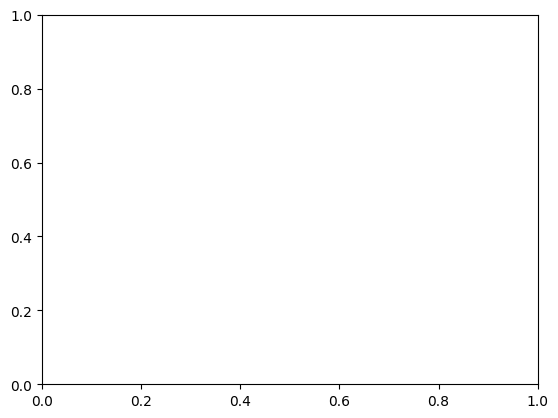

In [109]:
contingency_table = pd.crosstab(
    df['target_code'],
    [
        df['age_code'],
        df['menopause_code'],
        df['tumor-size_code'],
        df['inv-nodes_code'],
        df['node-caps_code'],
        df['deg-malig_code'],
        df['breast_code'],
        df['breast-quad_code'],
        df['irradiat_code'],
    ]
)
observed_chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(observed_chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v}")

# Visualize with a mosaic plot
mosaic_data = contingency_table.stack().reset_index()
mosaic(mosaic_data, ['target_code'] + list(mosaic_data.columns[1:]), title=f"Cramér's V: {cramers_v}")
plt.show()

Cramér's V: 0.15223702043024515


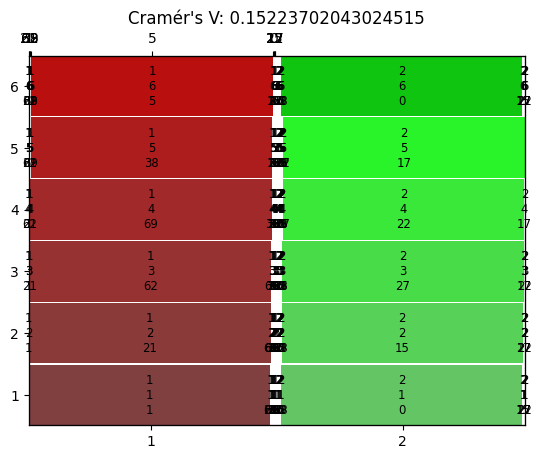

In [110]:
contingency_table = pd.crosstab(
    df['target_code'],
    [
        df['age_code']
    ]
)
observed_chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(observed_chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v}")

# Visualize with a mosaic plot

mosaic_data = contingency_table.stack().reset_index()
mosaic(mosaic_data, ['target_code'] + list(mosaic_data.columns[1:]), title=f"Cramér's V: {cramers_v}")
plt.show()

Cramér's V: 0.10491168418085384


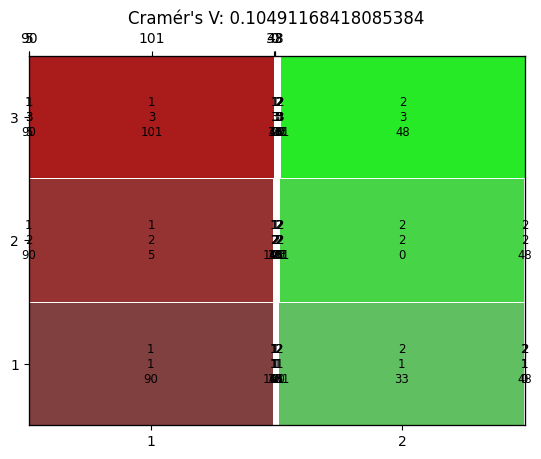

In [111]:
contingency_table = pd.crosstab(
    df['target_code'],
    [
        df['menopause_code']
    ]
)
observed_chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(observed_chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v}")

# Visualize with a mosaic plot

mosaic_data = contingency_table.stack().reset_index()
mosaic(mosaic_data, ['target_code'] + list(mosaic_data.columns[1:]), title=f"Cramér's V: {cramers_v}")
plt.show()

Cramér's V: 0.26190299923884897


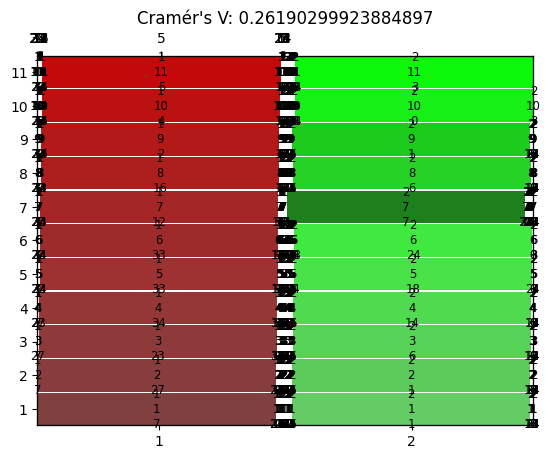

In [112]:
contingency_table = pd.crosstab(
    df['target_code'],
    [
        df['tumor-size_code']
    ]
)
observed_chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(observed_chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v}")

# Visualize with a mosaic plot

mosaic_data = contingency_table.stack().reset_index()
mosaic(mosaic_data, ['target_code'] + list(mosaic_data.columns[1:]), title=f"Cramér's V: {cramers_v}")
plt.show()

Cramér's V: 0.34817844106844337


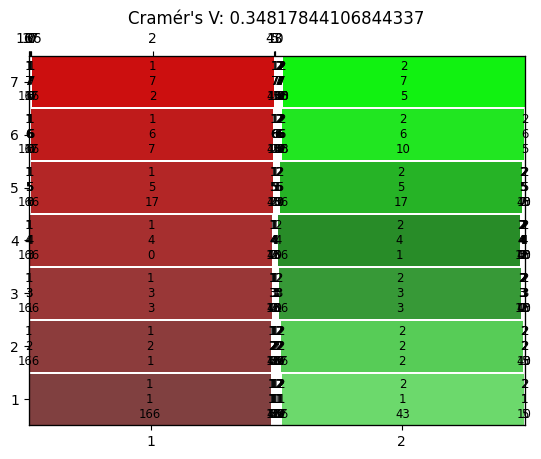

In [113]:
contingency_table = pd.crosstab(
    df['target_code'],
    [
        df['inv-nodes_code']
    ]
)
observed_chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(observed_chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v}")

# Visualize with a mosaic plot

mosaic_data = contingency_table.stack().reset_index()
mosaic(mosaic_data, ['target_code'] + list(mosaic_data.columns[1:]), title=f"Cramér's V: {cramers_v}")
plt.show()

Cramér's V: 0.279121734421927


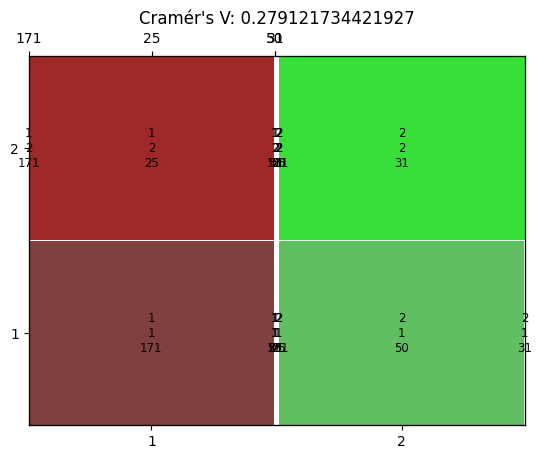

In [114]:
contingency_table = pd.crosstab(
    df['target_code'],
    [
        df['node-caps_code']
    ]
)
observed_chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(observed_chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v}")

# Visualize with a mosaic plot

mosaic_data = contingency_table.stack().reset_index()
mosaic(mosaic_data, ['target_code'] + list(mosaic_data.columns[1:]), title=f"Cramér's V: {cramers_v}")
plt.show()

Cramér's V: 0.3551380993117548
   target_code  node-caps_code    0
0            1               1  171
1            1               2   25
2            2               1   50
3            2               2   31


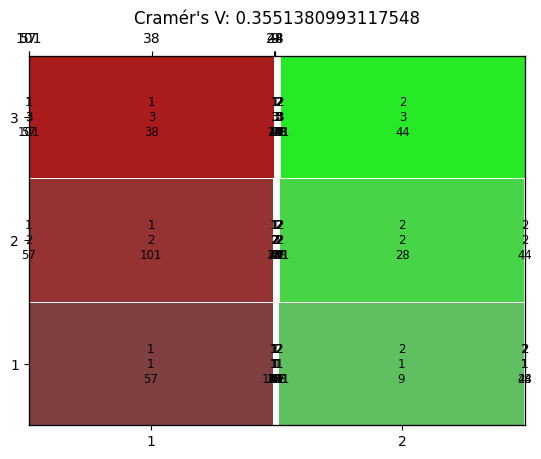

In [115]:
contingency_table = pd.crosstab(
    df['target_code'],
    [
        df['deg-malig_code']
    ]
)
observed_chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(observed_chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v}")

# Visualize with a mosaic plot
print(mosaic_data)
mosaic_data = contingency_table.stack().reset_index()
mosaic(mosaic_data, ['target_code'] + list(mosaic_data.columns[1:]), title=f"Cramér's V: {cramers_v}")
plt.show()

Cramér's V: 0.03335863006621423
   target_code  deg-malig_code    0
0            1               1   57
1            1               2  101
2            1               3   38
3            2               1    9
4            2               2   28
5            2               3   44


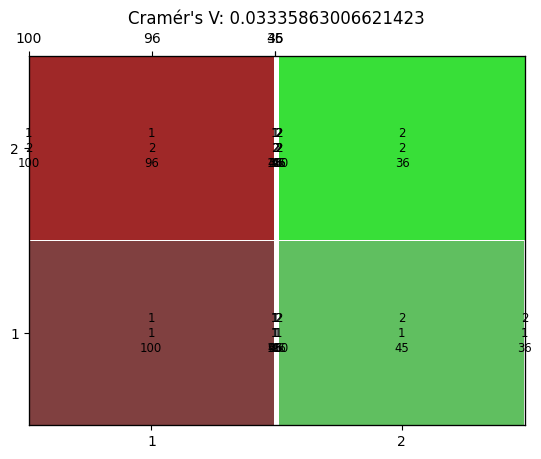

In [116]:
contingency_table = pd.crosstab(
    df['target_code'],
    [
        df['breast_code']
    ]
)
observed_chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(observed_chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v}")

# Visualize with a mosaic plot
print(mosaic_data)
mosaic_data = contingency_table.stack().reset_index()
mosaic(mosaic_data, ['target_code'] + list(mosaic_data.columns[1:]), title=f"Cramér's V: {cramers_v}")
plt.show()

Cramér's V: 0.10931857122458373
   target_code  breast_code    0
0            1            1  100
1            1            2   96
2            2            1   45
3            2            2   36


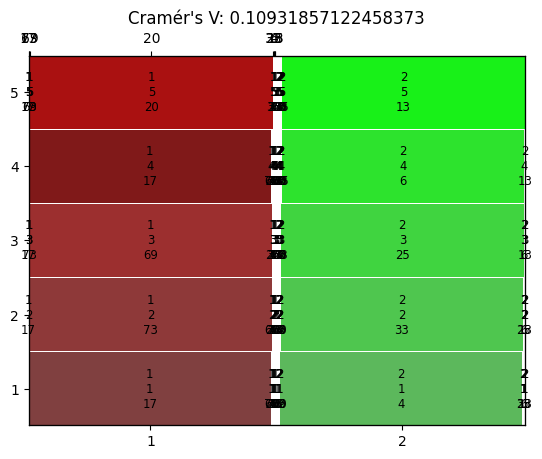

In [117]:
contingency_table = pd.crosstab(
    df['target_code'],
    [
        df['breast-quad_code']
    ]
)
observed_chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(observed_chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v}")

# Visualize with a mosaic plot
print(mosaic_data)
mosaic_data = contingency_table.stack().reset_index()
mosaic(mosaic_data, ['target_code'] + list(mosaic_data.columns[1:]), title=f"Cramér's V: {cramers_v}")
plt.show()

Cramér's V: 0.2164990489313846
   target_code  breast-quad_code   0
0            1                 1  17
1            1                 2  73
2            1                 3  69
3            1                 4  17
4            1                 5  20
5            2                 1   4
6            2                 2  33
7            2                 3  25
8            2                 4   6
9            2                 5  13


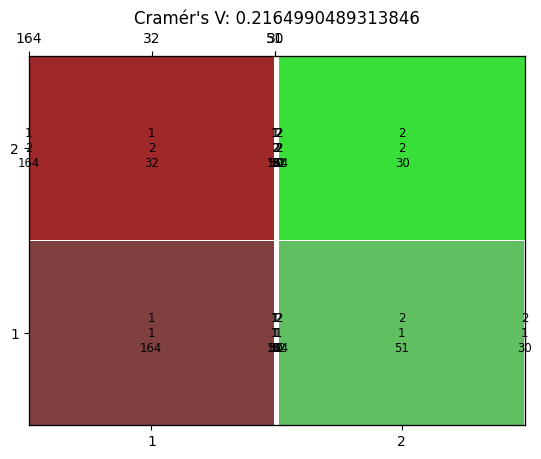

In [118]:
contingency_table = pd.crosstab(
    df['target_code'],
    [
        df['irradiat_code']
    ]
)
observed_chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(observed_chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v}")

# Visualize with a mosaic plot
print(mosaic_data)
mosaic_data = contingency_table.stack().reset_index()
mosaic(mosaic_data, ['target_code'] + list(mosaic_data.columns[1:]), title=f"Cramér's V: {cramers_v}")
plt.show()

Cramér's V: 0.9719819376969948
   target_code  irradiat_code    0
0            1              1  164
1            1              2   32
2            2              1   51
3            2              2   30


KeyError: "[('irradiat_code', '', '', '', '', '', '', '') (1, 3, 7, 1, 1, 2, 2, 5)\n (2, 2, 3, 1, 1, 3, 2, 3) (2, 3, 1, 1, 1, 2, 2, 1)\n (2, 3, 2, 1, 1, 1, 2, 2) (2, 3, 2, 1, 1, 2, 1, 4)\n (2, 3, 3, 1, 1, 1, 1, 2) (2, 3, 3, 1, 1, 1, 2, 2)\n (2, 3, 3, 6, 2, 3, 1, 2) (2, 3, 4, 1, 1, 2, 1, 4)\n (2, 3, 4, 1, 1, 3, 1, 1) (2, 3, 4, 1, 1, 3, 1, 3)\n (2, 3, 4, 5, 1, 2, 2, 1) (2, 3, 4, 5, 2, 2, 1, 2)\n (2, 3, 4, 5, 2, 2, 2, 3) (2, 3, 5, 1, 1, 1, 1, 1)\n (2, 3, 5, 1, 1, 2, 1, 2) (2, 3, 5, 1, 1, 2, 2, 2)\n (2, 3, 5, 5, 2, 3, 1, 2) (2, 3, 5, 6, 2, 2, 2, 3)\n (2, 3, 5, 6, 2, 3, 1, 4) (2, 3, 6, 1, 1, 1, 2, 3)\n (2, 3, 6, 1, 1, 2, 1, 3) (2, 3, 6, 1, 1, 3, 1, 2)\n (2, 3, 6, 5, 1, 3, 2, 3) (2, 3, 6, 6, 2, 2, 2, 5)\n (2, 3, 6, 7, 1, 2, 2, 3) (2, 3, 7, 1, 1, 3, 1, 2)\n (2, 3, 7, 7, 2, 3, 1, 2) (2, 3, 8, 1, 1, 1, 1, 3)\n (2, 3, 8, 1, 1, 2, 1, 2) (2, 3, 8, 1, 1, 2, 2, 5)\n (2, 3, 8, 5, 1, 3, 2, 5) (2, 3, 10, 1, 1, 2, 1, 4)\n (3, 1, 4, 1, 1, 2, 2, 3) (3, 1, 4, 1, 1, 3, 1, 2)\n (3, 1, 4, 1, 1, 3, 1, 3) (3, 1, 4, 5, 1, 3, 2, 2)\n (3, 1, 5, 1, 1, 2, 1, 2) (3, 1, 5, 2, 2, 3, 1, 4)\n (3, 1, 6, 1, 1, 2, 1, 3) (3, 1, 6, 5, 1, 3, 1, 2)\n (3, 1, 8, 3, 2, 2, 2, 3) (3, 3, 1, 1, 1, 2, 2, 4)\n (3, 3, 1, 1, 1, 3, 1, 1) (3, 3, 2, 1, 1, 1, 2, 3)\n (3, 3, 2, 1, 1, 1, 2, 4) (3, 3, 2, 1, 1, 2, 1, 2)\n (3, 3, 2, 1, 1, 2, 1, 3) (3, 3, 2, 1, 1, 2, 2, 2)\n (3, 3, 2, 1, 1, 2, 2, 3) (3, 3, 3, 1, 1, 2, 1, 2)\n (3, 3, 3, 1, 1, 2, 1, 3) (3, 3, 3, 1, 2, 3, 2, 3)\n (3, 3, 3, 2, 1, 3, 2, 4) (3, 3, 3, 3, 2, 3, 1, 2)\n (3, 3, 4, 1, 1, 1, 1, 4) (3, 3, 4, 1, 1, 1, 2, 2)\n (3, 3, 4, 1, 1, 1, 2, 5) (3, 3, 4, 1, 1, 2, 1, 1)\n (3, 3, 4, 1, 1, 2, 1, 2) (3, 3, 4, 1, 1, 2, 1, 3)\n (3, 3, 4, 1, 1, 2, 1, 4) (3, 3, 4, 1, 1, 2, 2, 3)\n (3, 3, 4, 1, 1, 2, 2, 5) (3, 3, 4, 1, 1, 3, 2, 2)\n (3, 3, 4, 5, 1, 2, 2, 2) (3, 3, 4, 5, 1, 2, 2, 3)\n (3, 3, 4, 5, 2, 2, 1, 2) (3, 3, 4, 5, 2, 2, 2, 5)\n (3, 3, 4, 6, 1, 2, 2, 2) (3, 3, 5, 1, 1, 1, 1, 4)\n (3, 3, 5, 1, 1, 1, 2, 2) (3, 3, 5, 1, 1, 1, 2, 4)\n (3, 3, 5, 1, 1, 2, 1, 2) (3, 3, 5, 1, 1, 2, 1, 3)\n (3, 3, 5, 1, 1, 2, 2, 1) (3, 3, 5, 1, 1, 2, 2, 2)\n (3, 3, 5, 1, 1, 2, 2, 3) (3, 3, 5, 1, 1, 3, 1, 3)\n (3, 3, 5, 1, 1, 3, 1, 5) (3, 3, 5, 1, 1, 3, 2, 3)\n (3, 3, 5, 7, 2, 3, 2, 3) (3, 3, 6, 1, 1, 1, 1, 2)\n (3, 3, 6, 1, 1, 1, 1, 5) (3, 3, 6, 1, 1, 1, 2, 3)\n (3, 3, 6, 1, 1, 2, 1, 4) (3, 3, 6, 1, 1, 2, 2, 4)\n (3, 3, 6, 1, 1, 2, 2, 5) (3, 3, 6, 1, 1, 3, 1, 3)\n (3, 3, 6, 1, 1, 3, 2, 5) (3, 3, 6, 1, 2, 3, 2, 5)\n (3, 3, 6, 2, 2, 3, 1, 3) (3, 3, 6, 3, 2, 3, 1, 2)\n (3, 3, 6, 5, 1, 2, 2, 3) (3, 3, 6, 5, 2, 2, 1, 5)\n (3, 3, 6, 5, 2, 2, 2, 2) (3, 3, 6, 6, 1, 2, 1, 3)\n (3, 3, 6, 6, 2, 3, 2, 3) (3, 3, 7, 1, 1, 1, 1, 2)\n (3, 3, 7, 1, 1, 1, 2, 3) (3, 3, 7, 1, 1, 2, 2, 5)\n (3, 3, 7, 1, 2, 3, 2, 2) (3, 3, 7, 1, 2, 3, 2, 3)\n (3, 3, 7, 7, 2, 2, 2, 3) (3, 3, 7, 7, 2, 2, 2, 5)\n (3, 3, 8, 1, 1, 1, 1, 2) (3, 3, 8, 1, 1, 1, 2, 3)\n (3, 3, 8, 1, 1, 2, 2, 2) (3, 3, 8, 5, 2, 3, 2, 3)\n (3, 3, 9, 1, 1, 2, 1, 2) (3, 3, 10, 1, 1, 1, 1, 2)\n (3, 3, 11, 1, 1, 2, 1, 2) (3, 3, 11, 1, 1, 2, 2, 2)\n (4, 1, 1, 1, 1, 1, 1, 2) (4, 1, 1, 1, 1, 1, 2, 1)\n (4, 1, 1, 1, 1, 2, 1, 1) (4, 1, 2, 1, 1, 1, 1, 2)\n (4, 1, 2, 1, 1, 1, 1, 3) (4, 1, 2, 1, 1, 1, 2, 3)\n (4, 1, 2, 1, 1, 2, 1, 2) (4, 1, 2, 1, 1, 2, 2, 2)\n (4, 1, 3, 1, 1, 1, 2, 1) (4, 1, 3, 1, 1, 2, 2, 2)\n (4, 1, 3, 1, 1, 2, 2, 5) (4, 1, 3, 1, 2, 2, 1, 1)\n (4, 1, 4, 1, 1, 1, 2, 2) (4, 1, 4, 1, 1, 2, 1, 3)\n (4, 1, 4, 1, 1, 2, 2, 1) (4, 1, 4, 1, 1, 2, 2, 3)\n (4, 1, 4, 1, 1, 3, 1, 3) (4, 1, 4, 1, 1, 3, 2, 3)\n (4, 1, 4, 1, 2, 2, 2, 3) (4, 1, 4, 5, 2, 2, 2, 3)\n (4, 1, 4, 5, 2, 3, 2, 5) (4, 1, 5, 1, 1, 1, 1, 2)\n (4, 1, 5, 1, 1, 1, 1, 4) (4, 1, 5, 1, 1, 2, 1, 2)\n (4, 1, 5, 1, 1, 2, 2, 3) (4, 1, 5, 1, 1, 3, 1, 5)\n (4, 1, 5, 3, 2, 3, 2, 3) (4, 1, 5, 5, 2, 3, 2, 3)\n (4, 1, 5, 6, 1, 3, 1, 2) (4, 1, 6, 1, 1, 1, 1, 3)\n (4, 1, 6, 1, 1, 1, 2, 1) (4, 1, 6, 1, 1, 1, 2, 2)\n (4, 1, 6, 1, 1, 1, 2, 5) (4, 1, 6, 1, 1, 3, 2, 2)\n (4, 1, 6, 5, 1, 3, 1, 2) (4, 1, 6, 5, 1, 3, 2, 3)\n (4, 1, 6, 6, 2, 2, 1, 2) (4, 1, 6, 6, 2, 2, 1, 4)\n (4, 1, 6, 6, 2, 3, 1, 4) (4, 1, 6, 7, 2, 3, 1, 4)\n (4, 1, 7, 1, 1, 2, 1, 2) (4, 1, 7, 1, 1, 2, 1, 3)\n (4, 1, 7, 1, 1, 3, 1, 2) (4, 1, 7, 1, 1, 3, 1, 3)\n (4, 1, 7, 3, 1, 3, 1, 2) (4, 1, 8, 1, 1, 2, 1, 2)\n (4, 1, 8, 1, 1, 3, 1, 3) (4, 1, 8, 1, 1, 3, 1, 5)\n (4, 1, 8, 1, 1, 3, 2, 3) (4, 1, 8, 5, 2, 2, 1, 2)\n (4, 1, 8, 6, 2, 3, 1, 2) (4, 1, 10, 1, 1, 2, 2, 5)\n (4, 1, 11, 1, 1, 1, 2, 5) (4, 2, 3, 1, 1, 2, 1, 2)\n (4, 2, 6, 1, 1, 3, 2, 3) (4, 3, 2, 1, 1, 1, 1, 2)\n (4, 3, 2, 1, 1, 2, 2, 3) (4, 3, 2, 1, 1, 3, 1, 2)\n (4, 3, 2, 5, 1, 1, 2, 3) (4, 3, 3, 1, 1, 1, 1, 2)\n (4, 3, 3, 1, 1, 2, 1, 2) (4, 3, 3, 1, 1, 2, 2, 2)\n (4, 3, 3, 1, 1, 2, 2, 4) (4, 3, 4, 1, 1, 1, 1, 2)\n (4, 3, 4, 5, 2, 2, 1, 2) (4, 3, 5, 1, 1, 1, 1, 2)\n (4, 3, 5, 1, 1, 1, 2, 3) (4, 3, 5, 1, 1, 2, 1, 2)\n (4, 3, 5, 1, 1, 2, 1, 5) (4, 3, 5, 1, 1, 2, 2, 4)\n (4, 3, 5, 1, 1, 3, 2, 2) (4, 3, 5, 1, 2, 2, 1, 3)\n (4, 3, 5, 5, 1, 2, 2, 3) (4, 3, 5, 5, 2, 2, 1, 2)\n (4, 3, 5, 5, 2, 3, 1, 2) (4, 3, 6, 1, 1, 1, 1, 1)\n (4, 3, 6, 1, 1, 3, 1, 2) (4, 3, 6, 1, 1, 3, 1, 5)\n (4, 3, 6, 1, 1, 3, 2, 3) (4, 3, 6, 5, 2, 2, 1, 2)\n (4, 3, 7, 1, 1, 2, 2, 3) (4, 3, 7, 3, 2, 3, 2, 5)\n (4, 3, 8, 1, 1, 2, 1, 3) (4, 3, 11, 1, 2, 2, 2, 3)\n (4, 3, 11, 7, 2, 2, 2, 3) (5, 1, 2, 1, 1, 1, 1, 2)\n (5, 1, 2, 1, 1, 1, 1, 3) (5, 1, 2, 1, 1, 1, 2, 2)\n (5, 1, 2, 1, 1, 2, 1, 2) (5, 1, 2, 1, 1, 2, 2, 3)\n (5, 1, 2, 6, 2, 3, 1, 3) (5, 1, 3, 1, 1, 1, 1, 4)\n (5, 1, 3, 1, 1, 1, 2, 3) (5, 1, 3, 1, 1, 2, 1, 2)\n (5, 1, 3, 1, 1, 2, 1, 3) (5, 1, 3, 1, 1, 2, 2, 2)\n (5, 1, 3, 1, 1, 2, 2, 3) (5, 1, 3, 1, 1, 3, 2, 3)\n (5, 1, 4, 1, 1, 1, 1, 2) (5, 1, 4, 1, 1, 1, 2, 3)\n (5, 1, 4, 1, 1, 2, 1, 3) (5, 1, 4, 1, 1, 2, 2, 3)\n (5, 1, 4, 1, 1, 3, 2, 2) (5, 1, 4, 4, 2, 3, 1, 2)\n (5, 1, 4, 5, 1, 2, 1, 2) (5, 1, 5, 1, 1, 2, 1, 2)\n (5, 1, 5, 1, 1, 2, 2, 2) (5, 1, 5, 1, 1, 3, 1, 3)\n (5, 1, 5, 1, 1, 3, 1, 4) (5, 1, 5, 1, 1, 3, 2, 2)\n (5, 1, 5, 1, 1, 3, 2, 3) (5, 1, 5, 5, 1, 2, 2, 5)\n (5, 1, 6, 1, 1, 1, 1, 3) (5, 1, 6, 1, 1, 1, 2, 3)\n (5, 1, 6, 1, 1, 2, 1, 2) (5, 1, 6, 1, 1, 2, 1, 3)\n (5, 1, 6, 1, 1, 3, 1, 2) (5, 1, 6, 1, 1, 3, 2, 1)\n (5, 1, 6, 1, 1, 3, 2, 3) (5, 1, 6, 1, 2, 2, 2, 5)\n (5, 1, 6, 5, 2, 2, 1, 1) (5, 1, 6, 5, 2, 3, 1, 2)\n (5, 1, 6, 6, 2, 2, 2, 5) (5, 1, 7, 6, 2, 3, 1, 2)\n (5, 1, 8, 1, 1, 2, 2, 2) (5, 1, 8, 5, 1, 2, 2, 3)\n (5, 1, 8, 5, 2, 3, 2, 2) (5, 1, 9, 1, 1, 1, 2, 5)\n (5, 1, 9, 6, 2, 3, 1, 1) (5, 1, 10, 1, 1, 1, 1, 1)\n (5, 1, 11, 1, 1, 2, 1, 2) (5, 1, 11, 1, 1, 2, 2, 3)\n (5, 1, 11, 1, 1, 3, 2, 3) (5, 2, 2, 1, 1, 1, 1, 5)\n (5, 2, 6, 1, 1, 1, 1, 2) (6, 1, 1, 1, 1, 1, 1, 4)\n (6, 1, 2, 1, 1, 2, 1, 1) (6, 1, 4, 1, 1, 3, 1, 3)\n (6, 1, 8, 1, 1, 1, 2, 3) (6, 1, 8, 1, 1, 1, 2, 5)] not in index"

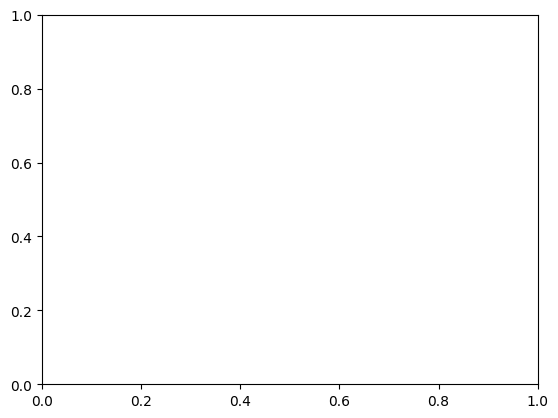

In [119]:
contingency_table = pd.crosstab(
    df['target_code'],
    [
        df['age_code'],
        df['menopause_code'],
        df['tumor-size_code'],
        df['inv-nodes_code'],
        df['node-caps_code'],
        df['deg-malig_code'],
        df['breast_code'],
        df['breast-quad_code'],
        df['irradiat_code'],
    ]
)
observed_chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(observed_chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v}")

# Visualize with a mosaic plot
print(mosaic_data)
mosaic_data = contingency_table.stack().reset_index()
mosaic(mosaic_data, ['target_code'] + list(mosaic_data.columns[1:]), title=f"Cramér's V: {cramers_v}")
plt.show()

In [120]:
df.isna().sum()

age                 0
menopause           0
tumor-size          0
inv-nodes           0
node-caps           0
deg-malig           0
breast              0
breast-quad         0
irradiat            0
target              0
age_code            0
menopause_code      0
tumor-size_code     0
inv-nodes_code      0
node-caps_code      0
deg-malig_code      0
breast_code         0
breast-quad_code    0
irradiat_code       0
target_code         0
dtype: int64